In [1]:
%run dataset_preparation.ipynb

DATASET PRONTO PARA USO!


dataset_preparation.ipynb:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  "cell_type": "markdown",


## Aplicando Decision Tree

In [2]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
# from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.tree import export_graphviz
#from sklearn.externals.six import StringIO  
from IPython.display import Image  
#import pydotplus
from sklearn.feature_extraction.text import TfidfTransformer

from sklearn.metrics import r2_score

#pip install pydotpus
#pip install graphviz

# Seta um valor para o random seed
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)

In [3]:
#X_train_DC, X_test_DC, y_train_DC, y_test_DC = train_test_split(X, y, test_size=0.1, random_state=RANDOM_SEED)


X_DT = result.loc[:, "Link 1"]
y_DT = result.loc[:, "Relevância"]

In [4]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_DT)

tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

In [5]:
X_train_DT, X_test_DT, y_train_DT, y_test_DT = train_test_split(X_train_tfidf, y_DT, test_size=0.33, random_state=42)

In [6]:
dtc = DecisionTreeClassifier()

In [7]:
dtc.fit(X_train_DT, y_train_DT)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [8]:
y_pred_DT = dtc.predict(X_test_DT)

In [9]:
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score

score = precision_score(y_test_DT, y_pred_DT)

print("The model accuracy is: {0}".format(score))

The model accuracy is: 0.8202247191011236


In [10]:
acc = accuracy_score(y_test_DT, y_pred_DT)
print(acc)

0.8341013824884793


In [11]:
#Resultados
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score, recall_score

f1_score = f1_score(y_test_DT, y_pred_DT) * 100
recall_score = recall_score(y_test_DT, y_pred_DT) * 100
precisao_score = precision_score(y_test_DT, y_pred_DT)

print("O modelo Decision_Tree acertou {0}%".format("%.2f" % f1_score))
print("O modelo Decision_Tree acertou {0}%".format("%.2f" % recall_score))
print("The model accuracy is: {0}%".format("%.2f" % (precisao_score*100)))

O modelo Decision_Tree acertou 80.22%
O modelo Decision_Tree acertou 78.49%
The model accuracy is: 82.02%


In [12]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test_DT, y_pred_DT)
print("Verdadeiro negativo: {0}".format(matrix[0][0]))
print("Falso positivo: {0}".format(matrix[0][1]))
print("Falso negativo: {0}".format(matrix[1][0]))
print("Verdadeiro positivo: {0}".format(matrix[1][1]))

Verdadeiro negativo: 108
Falso positivo: 16
Falso negativo: 20
Verdadeiro positivo: 73


In [13]:
# # Código para plotar o Decision Tree
# dot_data = StringIO()
# export_graphviz(dtc, out_file=dot_data,  
#                 filled=True, rounded=True,
#                 special_characters=True,feature_names = X_DT, class_names=['0','1'])

In [14]:
# # Plota o Decision Tree
# graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
# graph.write_png('grafico.png')
# Image(graph.create_png())

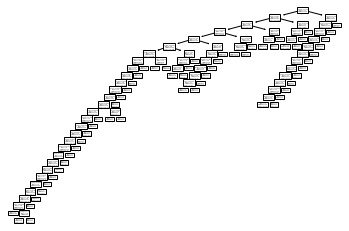

<Figure size 3600x3600 with 0 Axes>

In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plot_tree(dtc)
plt.figure( figsize=(50, 50))
plt.show()


In [29]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(dtc, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

C:\Users\Lais Nascimento\anaconda3\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


InvocationException: GraphViz's executables not found